Bayesian posterior inference: Explain Bayes’ Rule. Write some code to actually perform posterior sampling. Work out an example using conjugate priors. How does this compare with hypothesis testing? What are the underlying assumptions?

### In many real world applications, we don't know the probability of events, but we would like to estimate this unknown probability based on our hypothesis and collected evidence. Seems rational, right? 

#### This is the basis for Bayes' Rule, where we:
1. Identify possible models and construct prior probabilities (based on our knowledge or beliefs)
2. Collect data and create liklihoods, or the chance of getting this data given each model 
3. Use Bayes' rule to find posterior probabilities and update our knowledge so we can determine which model is likely to be correct


The basic conditional probability equation is:

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

The probability of A ${given}$ B is equal to the probability of both A and B occuring, normalized by the probability of B occuring. This is often written as:

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Here we would say the Posterior probability P(A|B) is equal to the Likelihood P(B|A) multiplied by the Prior P(A) normalized by the probability of data P(B).

#### Let's work through an example and describe some of the particulars as we go.
Say you're the city manager of Austin planning a free concert. Woah big city! And a heck of a music scene! This seems like a big task, and you want to know about how many people will come so you can plan ahead and order the right amount of food. You don't need an exact headcount because ordering is done in bulk. So you would like to know the approximate proportion of the city that will show up in 10% groups (10%, 20%, 30%, etc). Because you've been the city manager for a few years, you have some prior knowledge of these concerts and believe at least 20% of the town will show up, but not more than 90%. You also believe the 60% and 70% groups are 2X as likely as the others. What is the estimated proportion of the city that will show up? 

You're pretty savvy, and send out an email asking if people will attend the concert. You send it out to 150 people and 70 respond 'yes' and 80 respond 'no'. You know this proportion of attendance (70/150 = 0.46) is not the real estimate because surveys are not always accurate and people do change their minds. So, you want to employ some statistics to help you estimate the most likely proportion of people that will come.

Let's define this problem in Bayes terms.

#### 1. Identify possible models and construct prior probabilities

The models are the proportion of the town that will show up. We want to estimate the probability that each 'model' is true so we can determine the most likely scenario. The models are: p=0.3, p=0.4, p=0.5, p=0.6, p=0.6, p=0.8 and p=0.9
Prior probabilities are based on what we know about concert attendance. In this case, we have 7 models (p=0.3 ... p=0.9), if the probability of each model being true were equal the 'prior probabilities' would = 1/7. However, we know that p=0.6 is 2X as likely. The sum of prior probabilities must sum to 1. Therefore the model and priors are:


In [3]:
options(repos = c('https://cloud.r-project.org/'))
#update.packages(checkBuilt = TRUE)
#install.packages("dplyr", "C:/Users/nrb75/AppData/Local/Continuum/anaconda3/Lib/R")
install.packages(c("ggplot2", "sciplot", "reshape", "TeachBayes"))

In [4]:
library(TeachBayes)

Warning message:
"package 'TeachBayes' was built under R version 3.4.4"Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.4.4"Error: package or namespace load failed for 'dplyr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'R6' 2.2.1 is being loaded, but >= 2.2.2 is required


ERROR: Error: package 'dplyr' could not be loaded


In [ ]:
Models=c(0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
Priors=round(c(1/8, 1/8, 1/8, 2/8, 1/8, 1/8, 1/8),2)

df=data.frame(Models, Priors)
rownames(df)=c("p=0.3", "p=0.4", "p=0.5", "p=0.6", "p=0.7", "p=0.8", "p=0.9")
df

#### 2. Collect Data and create liklihoods

A liklihood is the probability of observing your result ${given}$ the model is true. In this scenario, the observed result is that from the survey. This is a binomial function where Success is defined as 'yes' I will attend the concert. Success=70, size = 150, and binomial probability of succes = models. Now we simply calculate the liklihood of observing the survey results, ${given}$ the model is true.

For example, the liklihood that p=0.3:

In [22]:
dbinom(70, size=150, prob=0.3)

[1] 6.762257e-06

This is a very low value! and it suggests the liklihood of observing this survey result, ${given}$ the actual probability of attendance is 0.3 is very low.

Calculating the liklihood for the remaining models given the survey data is true:

In [23]:
df$Liklihood=dbinom(70, size=150, prob=Models)
df


,Models,Priors,Liklihood
p=0.3,0.3,0.12,6.762257e-06
p=0.4,0.4,0.12,1.659816e-02
p=0.5,0.5,0.12,4.669402e-02
p=0.6,0.6,0.25,2.878376e-04
p=0.7,0.7,0.12,1.413591e-09
p=0.8,0.8,0.12,1.325743e-19
p=0.9,0.9,0.12,4.175768e-40


#### 3. Now we want to update our prior probabilities with a posterior probability, which depends on our priors and the observed data.

$Posterior\ probability =\frac{Prior\ x\ Liklihood} {\sum(Prior\ x\ Liklihood)}$


In [24]:
df$Product = df$Priors*df$Liklihood
df$Posterior=df$Product/sum(df$Product)
df

,Models,Priors,Liklihood,Product,Posterior
p=0.3,0.3,0.12,6.762257e-06,8.114709e-07,1.058279e-04
p=0.4,0.4,0.12,1.659816e-02,1.991780e-03,2.597578e-01
p=0.5,0.5,0.12,4.669402e-02,5.603283e-03,7.307517e-01
p=0.6,0.6,0.25,2.878376e-04,7.195939e-05,9.384579e-03
p=0.7,0.7,0.12,1.413591e-09,1.696309e-10,2.212241e-08
p=0.8,0.8,0.12,1.325743e-19,1.590892e-20,2.074760e-18
p=0.9,0.9,0.12,4.175768e-40,5.010921e-41,6.534989e-39


A good check is that the sum of the Posterior probabilities = 1.

In [25]:
sum(df$Posterior)

[1] 1

Good, the Posterior probabilities sum to 1. Now how are these Posterior Probabilities different than our Priors?

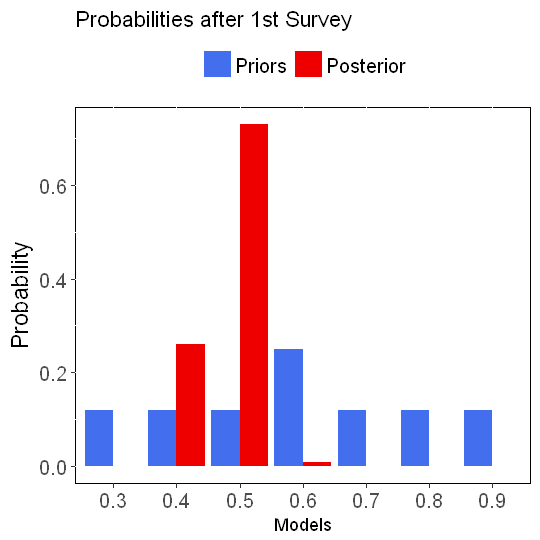

In [26]:
options(repr.plot.width=4.5, repr.plot.height=4.5)
library(reshape)
library(ggplot2)

df.long=melt(df, id="Models")

plt.std=plt.std=theme(legend.position="top", legend.text = element_text(size=12), axis.text.x = element_text(size=12),  axis.text.y = element_text(size=12), axis.title.y = element_text(size=14), strip.text.x = element_text(size=16), panel.background = element_rect(fill='white', colour='black'), legend.key = element_blank())
color1=c("royalblue2", "red2")
ggplot(data=subset(df.long, variable%in% c("Priors", "Posterior")), aes(x=as.factor(Models), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models")+ggtitle("Probabilities after 1st Survey")+plt.std

Origninally, the prior probabilities are more equally distributed across our models. But, with our beliefs and the survey data we see that it is far more likely the survey results came from a model where the proportion of town attandance is 0.5. 

This updates our probabilities and we would suggest the town manager order enough food for roughly 50% of Austin. $\textbf{Now she is more confident that the attendance will be near 50%, when earlier she thought it was more likely that the attendance could be 60%.}$ She is now able to save money and not waste food. What a good reason to employ Bayes' Theorem!

We're happy with these results, but suppose we wanted to send another survey closer to the concert date to give us a better estimate of the attendance. We would simply take the "Posteriors" from the results above and use them as our "Priors" in the calculations. 

In [27]:
df2=df[c("Models", "Posterior")]
colnames(df2)[2]="Priors2"
df2

,Models,Priors2
p=0.3,0.3,1.058279e-04
p=0.4,0.4,2.597578e-01
p=0.5,0.5,7.307517e-01
p=0.6,0.6,9.384579e-03
p=0.7,0.7,2.212241e-08
p=0.8,0.8,2.074760e-18
p=0.9,0.9,6.534989e-39


We calculate the Liklihoods next based on the new survey results.
Our new survey was sent to 100 people and 55 responded 'yes'. We calculate a new Liklihood for each model:

In [28]:
df2$Liklihood2=dbinom(65, size=100, prob=Models)
df2

,Models,Priors2,Liklihood2
p=0.3,0.3,1.058279e-04,4.273205e-13
p=0.4,0.4,2.597578e-01,2.562323e-07
p=0.5,0.5,7.307517e-01,8.638557e-04
p=0.6,0.6,9.384579e-03,4.913282e-02
p=0.7,0.7,2.212241e-08,4.677968e-02
p=0.8,0.8,2.074760e-18,1.889469e-04
p=0.9,0.9,6.534989e-39,1.161994e-11


In [29]:
Now we recalculate the product and Posterior proabilities:

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Now we
        ^


In [ ]:
df2$Product2 = df2$Priors*df2$Liklihood2
df2$Posterior2=df2$Product2/sum(df2$Product2)
df2

In [ ]:
df.long2=melt(df2, id="Models")

ggplot(data=subset(df.long2, variable%in% c("Priors2", "Posterior2")), aes(x=as.factor(Models), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+plt.std+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models")+ggtitle("Probabilities after 2nd Survey")

Now, after the 2nd survey we are still confident the proprotion of Austin attending the concert will be 50% (p=0.5), but there is also a roughly 42% chance that p=0.6. If we repeated this again and again and survey results came from a known distribution, we would converge on the true probabilities for each model.

We'd like to be a bit more confident before placing our food order. But, we don't have time for more surveys. We have some statistic nerds in the city planning group, and they suggest running simulations to approximate survey results and update our Posterior probabilities.


Using the same general idea as above, we'll construct a continuous Posterior distribution based on the Prior distribution. If these two distributions are in the same family they are called $conjugates$. 

For the binomial distribution (our survey successes or failures), the conjugate is a beta distribution. Thus, when we know the Prior distribution we can determine the Posterior distribution, which is proportional to the Likelihood x Prior distribution. This helps simplify our ability to calculate the Posterior. 

$Posterior = \frac{(Likelihood) * Prior}{Data}$ 

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$ 

Because the denominator is a normalizing term (makes the probabilities sum to 1), we know that Posterior is proportional to Likelihood and Prior.  Think of this like chemistry with conjugate acids and bases. If we know 1, we can determine the other one we need to nuetralize our chemicals.


In this binomial example:

$Posterior Beta \propto {(Binomial  Likelihood) * Beta Prior}$

We won't get into all the details of a Beta distribution, but think of it like a normal distribution and instead of being characterizied by the mean and standard deviation, it is paramaterized by two shape terms a and b.

In this example, we are trying to calculate the true proportion of people in Austin that will attend this concert. The stats nerds have looked at previous attendance records, they determine:

1. Prior attendance proportion median value = 0.60 
2. The attendance proportion follows a beta distribution with a=2.9 and b=2 (this is our Prior)



In [7]:
library(dplyr)
library(TeachBayes)
Prior_beta=c(2.9,2)
beta_draw(PriorBeta)


Warning message:
"package 'dplyr' was built under R version 3.4.4"

ERROR: Error: package or namespace load failed for 'dplyr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'R6' 2.2.1 is being loaded, but >= 2.2.2 is required


#### We simulate data from the Posterior distribution (Beta).
With a Beta distribution, this is pretty easy! The Posterior shape parameters are the Prior shape parameters scaled with the observed data.

a Posterior = a + # of successes (70 in our surveys)

b Posterior = b + # of failures (80 in our surveys)

Our new Posterior distribution is a Beta distribution with shape parameters:
a=2.9+70 = 72.9

b=2.0+80 = 80

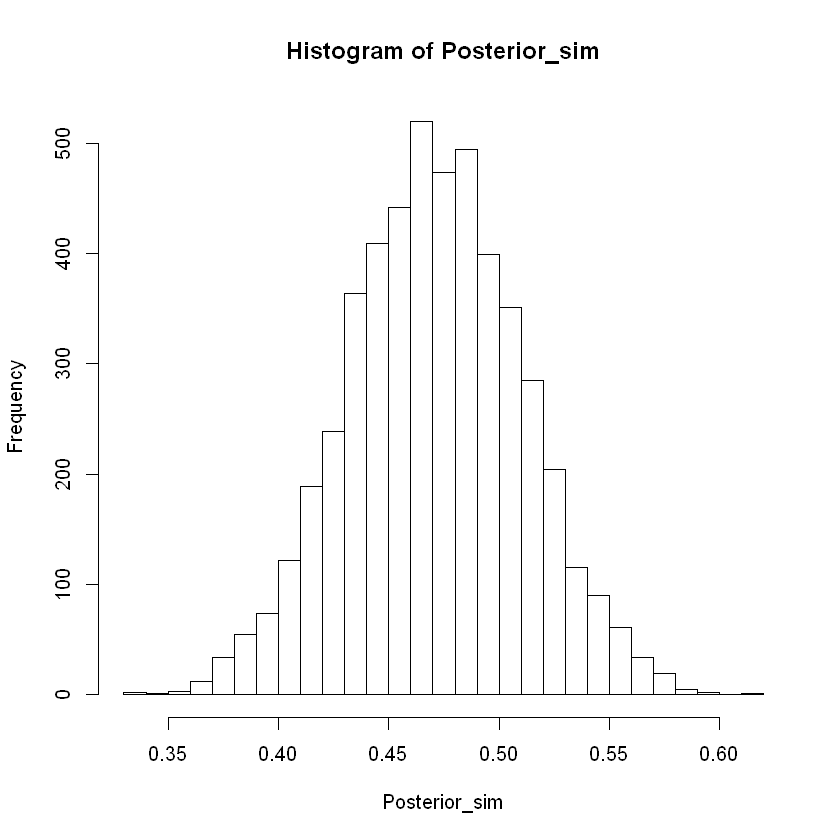

In [14]:
a=2.9+70 

b=2.0+80 
Posterior_sim=rbeta(5000, a,b)
hist(Posterior_sim, breaks=30)

Now we can make inferences with this Posterior distribution. 

Our boss (the Mayor!) wants us to order enough food so that there is relatively small, 20%, chance we run out of food. We are looking for the 1-0.20 quantile, or the 80% probability that this proportion of the town, or smaller, shows up to the concert.

Before our simulation, we would have used our prior knowledge to estimate this:


In [18]:
round(qbeta(0.8, 2.9,2 ),2)

[1] 0.78

This implies that we would need to order enough food for 78% of Austin!

With our updated Posterior, this quantile is:

In [19]:
round(quantile(Posterior_sim, .8),2)

80% 
0.5

Great! Now we only need to order enough food for 50% of Austin, but now we're more confident that this will be enough.

The Mayor also wants to know the probability that less than 40% of Austin will show up. If there will be low attendance, she may want to cancel the concert.

In [23]:
sum(Posterior_sim<0.4)/length(Posterior_sim)

[1] 0.0362

[1] 181

[1] 5000

This is only a 3.6% chance that less than 40% of Austin will show up, and thus a 96.4% chance that more than 40% of the city will show up! This is good news! The Show will go on!

The Mayor is skeptical of these results. She wants a classical (Frequentist) analysis as well. In this case, we must use the survey data and the Binomial distribution. 

In [ ]:
Here, 
n = number of trials = 150 surveys
p = probability of success = 70/150 = 0.46
x = x successful outcomes (less than 40% of the population = 0.4*150=60)

In [25]:
x= .4*150
p = 70/150
n =150

pbinom(x, size=n, prob=p)#probability of less than 40% of population showing up

[1] 0.05953906

The probability of having less than 40% of the town show up, according to classical methods, is almost 6%. This is much higher than our Bayes' approach.' But, it gives our boss peace of mind that we will likely have more than 40% of the city show up, even if we use the more conservative classical calculations.

In [ ]:
Posteior_beta=c(2.9+70, 2.0+80)

beta_prior_post(Prior_beta, Posterior_beta)

Not we are much more confident that the true proportion of town attendance will be around 48% of the population. This is very helpful, and ensures we will not waste money on excess food. Our boss (the Mayor!) wants us to order enough food so we are sure to have enough for our expected audiance (mean) plus an additional 20% ,

Why do we need the Priors are all, you may ask? Well, they help constrain our estimates. If we had no Priors, the Likelihood of observing each model ${given}$ the survey results, would be based soley on the survey results (yes and no responses for a binomial) and give no weight to the fact that usually 60% and 70% of the population attends a concert. Without these priors our estimated proportion of the town in attendance would be:

The Monte Carlo methods are simulations instead of analytical solutions. In frequentist (or the more traditional) statistics, you would use a function to maximize a likelihood. Here we simulate results and determine which results would occur in greatest frequency.